<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/forbes%20list.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df=pd.read_csv("/content/forbes_billionaires.csv")
df.head(7)

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",True
6,Larry Ellison,93.0,United States,software,7,76.0,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",True


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2755 non-null   object 
 1   NetWorth     2755 non-null   float64
 2   Country      2755 non-null   object 
 3   Source       2755 non-null   object 
 4   Rank         2755 non-null   int64  
 5   Age          2630 non-null   float64
 6   Residence    2715 non-null   object 
 7   Citizenship  2739 non-null   object 
 8   Status       2090 non-null   object 
 9   Children     1552 non-null   float64
 10  Education    1409 non-null   object 
 11  Self_made    2737 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 258.4+ KB


In [7]:
unnecessary_col=["Residence","Citizenship","Status","Children","Education"]
df=df.drop(unnecessary_col,axis=1)

In [8]:
df.head(7)

,Name,NetWorth,Country,Source,Rank,Age,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,True
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,True
6,Larry Ellison,93.0,United States,software,7,76.0,True


In [22]:
df.tail(10)

,Name,NetWorth,Country,Source,Rank,Age,Self_made
2745,Xu Jin,1.0,China,wine,2674,56.0,True
2746,Vadim Yakunin,1.0,Russia,pharmacy,2674,58.0,True
2747,Mark Haoyong Yang,1.0,China,e-commerce,2674,46.0,True
2748,Yao Hsiao Tung,1.0,Singapore,Manufacturing,2674,81.0,True
2749,Yu De-Chao,1.0,United States,pharmaceuticals,2674,57.0,True
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,True
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,True
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,True
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,True
2754,Zhou Wei family,1.0,China,Software,2674,54.0,True


In [9]:
df.describe()

,NetWorth,Rank,Age
count,2755.000000,2755.000000,2630.00000
mean,4.749220,1345.663521,63.26730
std,9.615358,772.669811,13.47916
min,1.000000,1.000000,18.00000
25%,1.500000,680.000000,54.00000
50%,2.300000,1362.000000,63.00000
75%,4.200000,2035.000000,73.00000
max,177.000000,2674.000000,99.00000


In [12]:
df.Age.isnull().sum()

125

In [14]:
df.isnull().sum()

Name           0
NetWorth       0
Country        0
Source         0
Rank           0
Age          125
Self_made     18
dtype: int64

In [18]:
col=["Age"]
for i in col:
  mean=df[i].mean()
  df[i]=df[i].replace(np.NAN,mean)

In [19]:
df.isnull().sum()

Name          0
NetWorth      0
Country       0
Source        0
Rank          0
Age           0
Self_made    18
dtype: int64

In [23]:
col=["Self_made"]
for i in col:
  mode=df[i].mode()
  df[i]=df[i].replace(np.NAN,0)
  df[i]=df[i].replace(0,mode)
df.isnull().sum()

ValueError: ignored

In [21]:
df["Self_made"].isnull().any()

True

In [24]:
mode=df[i].mode()
mode

0    True
dtype: object

In [25]:
df["Self_made"]=df["Self_made"].fillna(df["Self_made"].mode()[0])

In [26]:
df.head(7)

,Name,NetWorth,Country,Source,Rank,Age,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,True
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,True
6,Larry Ellison,93.0,United States,software,7,76.0,True


In [27]:
df["Self_made"].isnull().any()

False

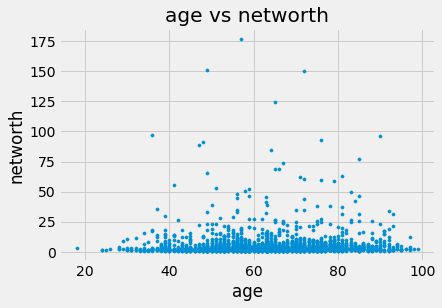

In [53]:
with plt.style.context("fivethirtyeight"):
  plt.scatter(df.Age,df.NetWorth,s=10)
  plt.xlabel("age")
  plt.ylabel("networth")
  plt.title("age vs networth")
  plt.show()

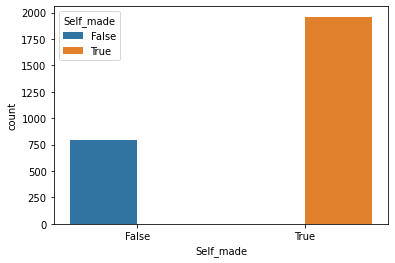

In [29]:
sns.countplot(x="Self_made",data=df,hue="Self_made")


In [31]:
df.nlargest(10,"NetWorth")["Self_made"].value_counts()

True     8
False    2
Name: Self_made, dtype: int64

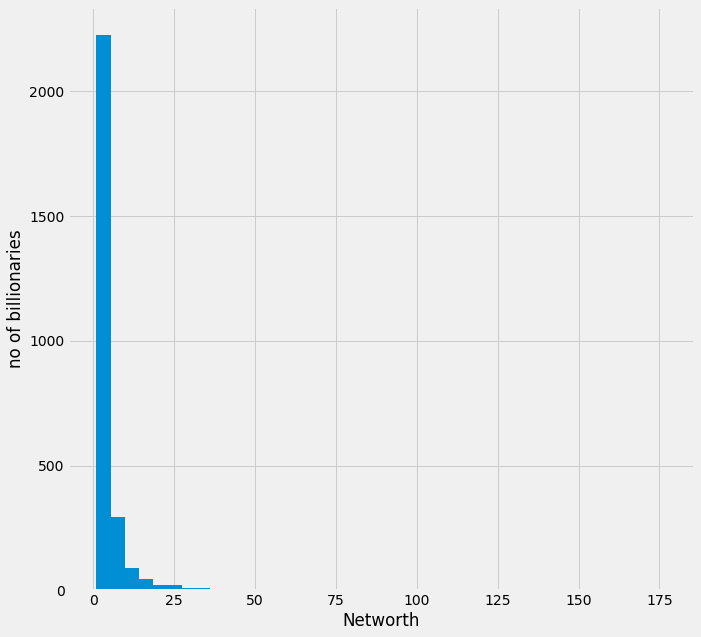

In [36]:
with plt.style.context("fivethirtyeight"):
  df.NetWorth.hist(figsize=(10,10),bins=40)
  plt.xlabel("Networth")
  plt.ylabel("no of billionaries")
  plt.show()

In [38]:
df[df.NetWorth>=100].value_counts()

Name                      NetWorth  Country        Source         Rank  Age   Self_made
Jeff Bezos                177.0     United States  Amazon         1     57.0  True         1
Elon Musk                 151.0     United States  Tesla, SpaceX  2     49.0  True         1
Bill Gates                124.0     United States  Microsoft      4     65.0  True         1
Bernard Arnault & family  150.0     France         LVMH           3     72.0  False        1
dtype: int64

In [40]:
df[df.NetWorth<50].value_counts().sum()

2731

In [45]:
x=df.Age.min()
df[df.Age==x]

,Name,NetWorth,Country,Source,Rank,Age,Self_made
940,Kevin David Lehmann,3.3,Germany,drugstores,925,18.0,False


In [46]:
y=df.Age.max()
df[df.Age==y]

,Name,NetWorth,Country,Source,Rank,Age,Self_made
1611,George Joseph,2.0,United States,insurance,1580,99.0,True


In [47]:
df.Rank.value_counts()

2524    150
2378    146
2141    122
2263    115
2035    106
       ... 
77        1
73        1
69        1
65        1
2         1
Name: Rank, Length: 245, dtype: int64

### as you see here there are numbers of persons placed in a same rank itself so to have a rank for each and every person

In [49]:
df["new_rank"]=df["Rank"].index+1
df.head(7)

,Name,NetWorth,Country,Source,Rank,Age,Self_made,new_rank
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,True,1
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,True,2
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,False,3
3,Bill Gates,124.0,United States,Microsoft,4,65.0,True,4
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,True,5
5,Warren Buffett,96.0,United States,Berkshire Hathaway,6,90.0,True,6
6,Larry Ellison,93.0,United States,software,7,76.0,True,7


In [51]:
df.new_rank.value_counts()

2047    1
1122    1
1138    1
1136    1
1134    1
       ..
2506    1
457     1
2504    1
455     1
2049    1
Name: new_rank, Length: 2755, dtype: int64

In [62]:
print("there are total of {} countries ".format(len(df.Country.unique())))
nation_count=df.Country.value_counts()[0:]

there are total of 70 countries 


In [65]:
nation_count.head(10)

United States     724
China             626
India             140
Germany           136
Russia            118
Hong Kong          71
Brazil             65
Canada             64
United Kingdom     56
Italy              51
Name: Country, dtype: int64

1

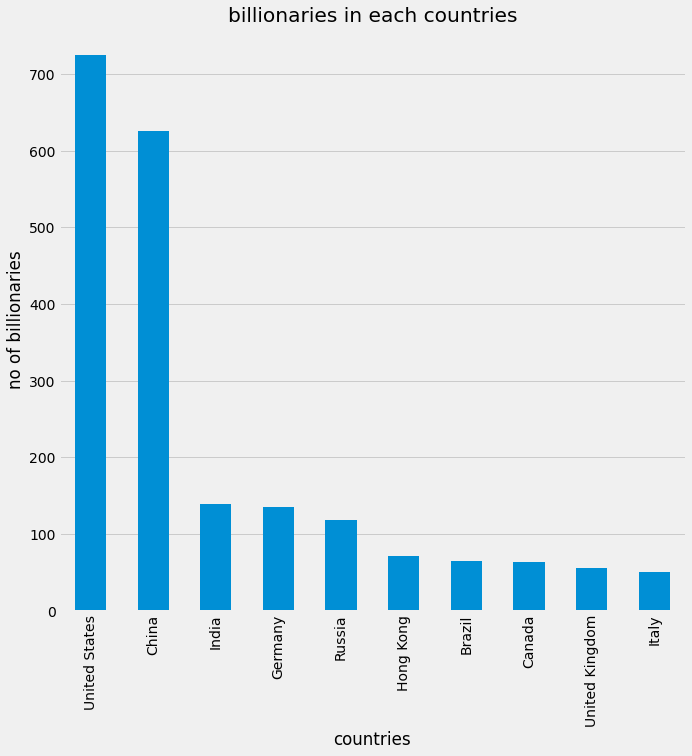

In [78]:
with plt.style.context("fivethirtyeight"):
 nation_count.head(10).plot(kind="bar",figsize=(10,10))  ## in here if we use kind="barh" the plot will appear with respect to x-axis
 plt.xlabel("countries")
 plt.ylabel("no of billionaries")
 plt.grid(axis="x")
 plt.title("billionaries in each countries")
 plt.show()